In [1]:
import talib
# Imports
import yfinance as yf
import pandas as pd
import numpy as np
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,mean_squared_error

In [2]:
# Download historical market data
ticker = "SPY"
stock = yf.Ticker(ticker)

# get historical market data
hist = stock.history(period="3y")

In [3]:
# Download historical data as dataframe
spy_data = yf.download('SPY', start='2020-01-01', end='2023-06-30')

[*********************100%***********************]  1 of 1 completed


In [4]:
spy_data.to_csv('SPY_data.csv')

In [5]:
spy_df =pd.read_csv('SPY_data.csv')
spy_df.dropna()

spy_df.shape

(879, 7)

In [6]:
spy_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,323.540009,324.890015,322.529999,324.869995,307.375671,59151200
1,2020-01-03,321.160004,323.640015,321.100006,322.410004,305.048126,77709700
2,2020-01-06,320.489990,323.730011,320.359985,323.640015,306.211945,55653900
3,2020-01-07,323.019989,323.540009,322.239990,322.730011,305.350922,40496400
4,2020-01-08,322.940002,325.779999,322.670013,324.450012,306.978271,68296000


(array([-200.,    0.,  200.,  400.,  600.,  800., 1000.]),
 [Text(-200.0, 0, '2022-09-13'),
  Text(0.0, 0, '2020-01-02'),
  Text(200.0, 0, '2020-10-16'),
  Text(400.0, 0, '2021-08-04'),
  Text(600.0, 0, '2022-05-19'),
  Text(800.0, 0, '2023-03-08'),
  Text(1000.0, 0, '')])

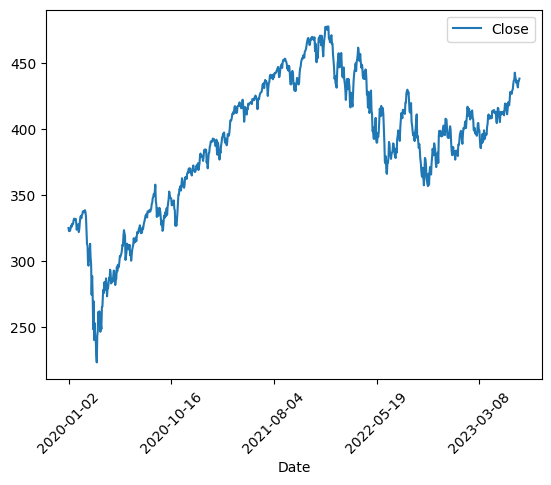

In [7]:
spy_df.plot(x='Date',y='Close')
plt.xticks(rotation=45)

In [9]:
# Step 2: Feature Engineering
rsi_period = 14
spy_df['RSI'] = talib.RSI(spy_df['Close'], timeperiod = rsi_period)

In [10]:
spy_df.dropna(how='any', inplace=True) 

In [14]:
buy_threshold = 30
sell_threshold = 70
# if signal is giving 0 then no trade recommended .
spy_df['Signal'] = 0  # Initialize all signals as 0
spy_df.loc[spy_df['RSI'] < buy_threshold, 'Signal'] = 1  # Assign buy signal
spy_df.loc[spy_df['RSI'] > sell_threshold, 'Signal'] = -1  # Assign sell signal

In [31]:
spy_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,RSI,Signal
14,2020-01-23,330.630005,332.170013,329.410004,331.720001,313.856781,51963000,69.274020,0
15,2020-01-24,332.440002,332.529999,327.359985,328.769989,311.065704,87578400,58.767538,0
16,2020-01-27,323.029999,325.119995,322.660004,323.500000,306.079407,84062500,45.493409,0
17,2020-01-28,325.059998,327.850006,323.600006,326.890015,309.286896,63834000,52.868338,0
18,2020-01-29,328.380005,328.630005,326.399994,326.619995,309.031403,53888900,52.261781,0


In [16]:
X = spy_df['RSI'].values.reshape(-1, 1)  # Reshape to a 2D array if needed
Y = spy_df['Signal'].values


In [17]:
# Step 4: Splitting Data
X = spy_df[['RSI']]
X = X[:(len(spy_df)-1)]
display(X)
y = spy_df['Signal']
y=y[:int(len(spy_df)-1)]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

,RSI
14,69.274020
15,58.767538
16,45.493409
17,52.868338
18,52.261781
...,...
873,63.838388
874,58.060143
875,55.175454
876,60.782984


In [18]:
# Step 5: Model Selection
model = RandomForestRegressor()

In [19]:
# Step 6: Model Training
model.fit(X_train, y_train)

RandomForestRegressor()

In [20]:
#Test the model
predictions = model.predict(X_train)
print('The model score is:',model.score(X_train,y_train))

The model score is: 0.9999702628442797


In [30]:
#Make the prediction
new_data = spy_df[['RSI']].tail(1)
prediction_1 = model.predict(new_data)
print('The model predicts the last row or day to be:',prediction_1)
print('Actual value is:',spy_df[['Signal']].tail(1).values[0])

The model predicts the last row or day to be: [0.]
Actual value is: [0]


In [22]:
# Step 7: Model Evaluation
y_pred = model.predict(X_test)
#accuracy = accuracy_score(y_test, y_pred)
print('The model score is:',model.score(X_test,y_test))
#print(f"Accuracy: {accuracy}")

The model score is: 0.9712201517706577


In [23]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.0011404624277456647


In [25]:
# Step 8: Signal Generation
last_data = spy_df[['RSI']].values[-1].reshape(1, -1)
predicted_label = model.predict(last_data)[0]
if predicted_label == 1:
    signal = 'Buy'
else:
    signal = 'Sell'
print(f"Signal: {signal}")

Signal: Sell


C:\Users\lenovo\anaconda3\envs\p2_algo\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
